In [ ]:
# Import Libraries
import pandas as pd
# import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read data
path = '01 - Data/ecom customer_data.xlsx'

In [ ]:
# Read Data into a DataFrame
df = pd.read_excel(path)

In [ ]:
# ------------------------------------------------------------------
# HANDLE NULLS IN THE GENDER COLUMN
# ------------------------------------------------------------------

# Fill NULLS in this new copy with new values
df['Gender'] = df['Gender'].fillna('No Gender')

# Check Unique Values in the Gender Column
df['Gender'].unique()

# Check for NULL Values
# df.isnull().sum()

<Axes: >

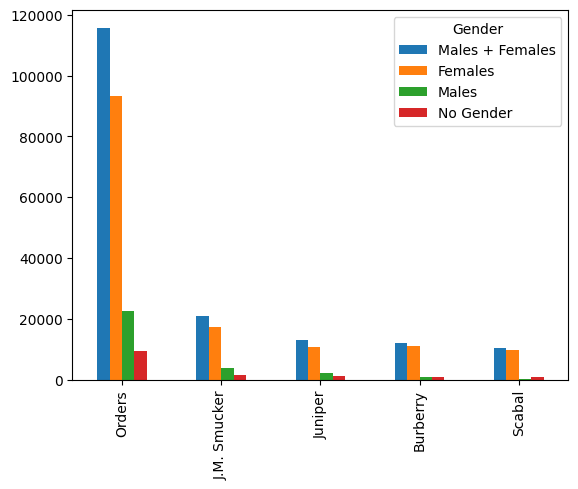

In [105]:
# ------------------------------------------------------------------
# TRANSPOSE THE DF INTO NEW COLUMNS
# ------------------------------------------------------------------

# Make a copy of the DF
df_t = df.copy()

# Group the Data by the unique values in Gender Column
# Then Aggregate the result by the sum of each occurance
df_t = df_t.groupby('Gender').sum()

# Transpose the DF
df_t = df_t.T

# New column as a sum of Males and Females
df_t['Males + Females'] = df_t['M'] + df_t['F']

cols = {'F' : 'Females', 'M' : 'Males'}
df_t.rename(columns = cols, inplace = True)
# Rearrange columns
df_t = df_t[['Males + Females', 'Females', 'Males', 'No Gender']]

# Sort Values from Highest to Lowest
df_t = df_t.sort_values(by = 'Males + Females', ascending = False)

df_t[1:6].plot.bar()